# Using Spectroscopy to Study Galaxies

## What is a Spectrum?
Light, similar to sound, is energy that travels as a wave (a wave of electric and magnetic fields in the case of light). The *wavelength* of light just describes the distance between peaks in a traveling light wave. The figure below shows a wave with its wavelength labeled.

![figure1](images/wavelength_6.png)

It is rare for anything to emit light at just *one* wavelength, however. Almost everything that we see is made up of light at many different wavelengths. Let's imagine that we wanted to know how much light of each wavelength is being emitted by a light source, say the Sun. To accomplish this, we can take a *spectrum*, meaning that we split the light into its component colors or wavelengths. This is what a prism does when it makes a rainbow out of sunlight: it splits up light from the Sun into all of the visible colors from red to violet, as shown below. 

![figure2](images/prismcolors.png)

Similar to sunlight, when we collect the light from a star or a galaxy and spread it out, we can study how bright something is at each wavelength: a.k.a., its spectrum. Analyzing the spectrum of an object tells us a lot of information: its temperature, what it's made of, how fast it's moving, and more.

## How Do we Get so Much Information from a Spectrum?
When we split up the light coming from a light bulb (for example) and look at its spectrum, it looks like a smooth rainbow, like the top panel of the figure below, where the x-axis is wavelength in nanometers. But, if you take hydrogen gas, super heat it/shock into a glowing plasma, and take a spectrum of the glowing hydrogen, it will look like the bottom panel of the figure below, with light only showing up at very specific wavelengths.

![figure3](images/spectrum.png)

These features at specific wavelengths are called *emission lines*. Each chemical element gives off light at particular wavelengths when its atoms get excited (like in a hot plasma), so these lines act like a fingerprint that tells us which elements are present. You can see examples below of emission lines coming from other elements, acting as unique "fingerprints" for each element.

![figure4](images/element_spectra.png)

## What Produces Emission Lines in a Galaxy?
Hot plasma may not be common here on Earth, but it is quite common in galaxies! Emission lines in galaxies are mostly produced by clouds of gas and plasma that are being energized by nearby sources of energy, usually ultraviolet light, x-rays, or collisions. These gas clouds are part of the interstellar medium (ISM), which fills the space between stars. We will elaborate on this in the next section.

Young, hot stars can heat the surrounding hydrogen gas and cause it to glow, producing strong hydrogen emission lines.

Exploding stars (supernovae), stellar winds, and supermassive black holes (AGN) can also energize the gas and influence the shape of the spectrum.

## What is the Interstellar Medium (ISM)?
You may have heard that space is a vacuum, but this isn't completely true. The reason that people say this is because, compared to Earth's atmosphere, the matter in space is *extremely* diffuse. To give you an idea of how diffuse this gas is, Earth's atmosphere has roughly $10^{19}$ particles per cubic centimeter. In many regions of the ISM, you will typically find $10^2 - 10^4$ particles per cubic centimeter. In other words, the Earth's atmosphere can be up to **one hundred thousand trillion** times denser than the ISM! And yet, even though it is widely spread out, there is so much material in the ISM that it emits enormous amounts of light when it is energized.

The interstellar medium is made of gas (mostly hydrogen and helium) and dust that fills the space between stars in a galaxy, and it plays a very important role in galaxy evolution. New stars form out of this gas, and the deaths of stars return energy and elements back into the medium. When the gas in the ISM is heated or ionized, it produces *emission lines*, just like the ones shown in the images above.

## Redshift ($z$) and the Expanding Universe?
We have known since the 1920s that the universe is expanding, which means that distant galaxies appear to be moving away from us. When light from a distant galaxy is emitted, it travels towards the Earth through the expanding Universe, and this causes the light waves to become stretched out, like a slinky. This effect causes the entire spectrum to "shift" toward redder colors and is known as **redshift**. The more distant a galaxy is, the more that its light is "redshifted". You can see this effect in the image below. By measuring how much the light is redshifted, astronomers can determine how far away a galaxy is and learn about the history and expansion of the universe.

![figure5](images/Measuring_Distance_With_Redshift.jpg)

## Observed Wavelength and Redshift

When we observe a distant, "redshifted" galaxy's spectrum, we see that the wavelengths of its emission lines are at redder (larger) wavelengths compared to where they would appear in a laboratory. This **redshift** ($z$) is calculated by relating the **observed wavelength** $\lambda_{\text{obs}}$ to the **rest-frame (original/laboratory) wavelength** $\lambda_{\text{rest}}$ using the equation:

$$
\lambda_{\text{obs}} = \lambda_{\text{rest}} (1 + z)
$$

Below, we see an image showing how a galaxy's spectrum changes depending on its redshift, or how far away it is. See any emission lines that look familiar in the top panel? (*Hint: Look at the Hydrogen emission line spectrum in one of the images above.*)

![figure6](images/galaxy_redshift_illustration.png)

# The goal of this project:

Now that you know what redshift is and how it affects spectra, you're ready to apply that knowledge to real data.  

In this project, you'll measure the observed wavelength of an emission line in several galaxy spectra and match each one to its known redshift. Then, you'll perform a linear fit to determine the line's rest-frame wavelength and figure out which element it comes from!

---

# Important emission lines in galaxy spectra

> Coding learning goal: 
>*   Locate files and directories, and identify the corresponding paths
>*   Read and understand what a function does and how to use it
>*   Plot a spectrum

Let's look at a nice spectrum of a galaxy!

In [28]:
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from astropy.table import Table
from astropy.io import fits
import pandas as pd
import os
import sys
from glob import glob
sys.path.append('./scripts/')
from helper_functions import *

In [7]:
# Define the data directory

# example: raw_data_dir = 'data/raw_spectra/'
raw_data_dir = 'data/spectra/'  # Where the spectra are stored
figure_dir = './'    # Where you want to save plots

Look through these premade functions. Do you roughly understand what they do?

In [8]:
def read_spectrum(filename):
    """
    Reads a FITS file from JWST and returns the spectrum data.
    
    Parameters:
    filename (str): The path to the FITS file.
    
    Returns:
    wavelength (numpy.ndarray): The wavelength data from the spectrum.
    flux (numpy.ndarray): The flux data from the spectrum.
    """
    
    t = Table.read(filename)

    wavelength = t['wavelength']
    flux = t['flux']

    return wavelength, flux

In [9]:
# Pre-made function to plot a spectrum
def plot_spectrum(filename, wave_range=None, fig=None, ax=None):
    """
    Plots the spectrum from the given filename.

    Parameters:
        filename (str): Path to the spectrum file.
        wave_range (tuple, optional): (wave_min, wave_max) for x-axis limits.
        fig (matplotlib.figure.Figure, optional): Existing figure to use.
        ax (matplotlib.axes.Axes, optional): Existing axes to use.

    Returns:
        fig, ax: The figure and axis containing the plot.
    """
    wave, flux = read_spectrum(filename)

    # Apply wavelength range if specified
    if wave_range is not None:
        wave_min, wave_max = wave_range

        # Create a mask to isolate the wavelength region
        mask = (wave >= wave_min) & (wave <= wave_max)

        # Apply the mask to the wavelength and flux arrays
        wave = wave[mask]
        flux = flux[mask]

    # Create figure and axis if not provided
    if ax is None or fig is None:
        fig, ax = plt.subplots(figsize=(8, 4))

    # Plot the spectrum
    ax.step(wave, flux, where='mid', color='black', lw=1)
    ax.set_xlabel('Wavelength [Å]')
    ax.set_ylabel('Flux')

    if wave_range is not None:
        ax.set_xlim(wave_min, wave_max)

    return fig, ax


## Plot a spectrum

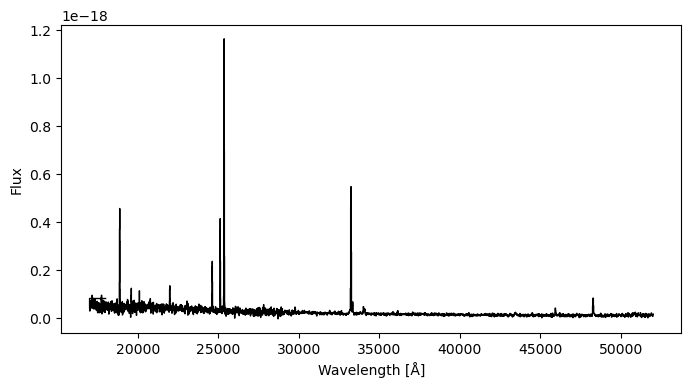

In [111]:
# Read in a spectrum and plot it!

# Specify the file name of the spectrum
spectrum_fn = 'galaxy_110_goods-n-mediumjwst_spectrum.fits'

# Plot the spectrum!
# First, let's define a figure and axis
fig, ax = plt.subplots(1,1, figsize=(8,4))

# Now, let's use the plot_spectrum() function we saw above
fig, ax = plot_spectrum(raw_data_dir+spectrum_fn, fig=fig, ax=ax)

Awesome! You just plotted a spectrum of a galaxy! Notice that we did this by using a function called `plot_spectrum()` that we created above. Make sure you understand what is happening in the function.

What kind of features can you see in the spectrum? Continuum? Emission lines? Absorption lines? 


## Zoom in on some emission lines

Emission lines act like fingerprints for chemicals and elements in galaxies --- once you find a pattern, you start spotting them in most other spectra. Let's zoom into an easily recognizable group of 3 emission lines around 25000 Angstroms...

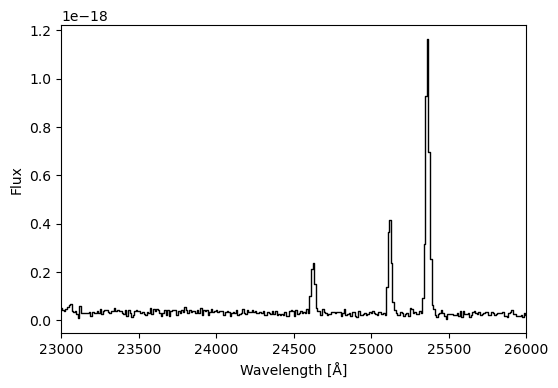

In [112]:
# Define the range of wavelengths to zoom in on
min_wave = 23000 #Angstroms  You should edit this 
max_wave = 26000 #Angstroms  You should edit this too
test_wave_range = [min_wave, max_wave]   # Create a list with the min and max wavelength

fig, ax = plt.subplots(1,1, figsize=(6,4))

# Input the additional argument "wave_range" to plot_spectrum() 
# to zoom in on a specific wavelength range
fig, ax = plot_spectrum(raw_data_dir+spectrum_fn, fig=fig, ax=ax, wave_range=test_wave_range)

If the spectrum is not zoomed in enough, try changing `min_wave` and `max_wave` to capture the 3 emission lines better

## Find the same group of emission lines in a different spectrum

Now, let's plot another spectrum. Can you find this group of emission lines in a new spectrum? Try zooming into the group of lines. Are they still at around 25000 Angstroms?

In [ ]:
# Specify another file name 
spectrum_fn = 'FIXME_spectrum2.fits'

# Define a new wavelength range
min_wave = FIXME #Angstroms
max_wave = FIXME #Angstroms
test_wave_range = [min_wave, max_wave]

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig, ax = plot_spectrum(raw_data_dir+spectrum_fn, fig=fig, ax=ax, wave_range=test_wave_range)

What is the approximate wavelength of the ***rightmost emission line***? Note that this is not the wavelength you would see in a laboratory!

The emission lines of far-away galaxies are often redshifted away from what they would look like in a laboratory. Since the wavelength of an emission line of a redshifted galaxy isn't its true wavelength, we call it the ***"observed wavelength"***.

***

# Using code to find the wavelength of an emission line

> Coding learning goal: 
>*  Using a premade function to fit an emission line 
>*  Overlay a curve on an existing plot

While we can try to figure out the observed wavelength of emission lines by eye and hope for the best, that's not very scientific... Is the emission line exactly at one single wavelength? 

What we can do instead, is write some code to find the "center" of an emission line. The function `fit_gaussian()` helps us create a model emission line that best matches the one in the spectrum. After it figures out the best model, it tells us what the emission line "center" of this model is.

Let's try to run `fit_gaussian()` to our first spectrum and see what it outputs, specifically the ***rightmost emission line in the group of three*** we saw earlier. You can also find this function in the `helper_functions.py` script in the scripts directory.

In [38]:
# Run fit_gaussian() on the first spectrum

spectrum_fn = 'galaxy_110_goods-n-mediumjwst_spectrum.fits'

# Define a new wavelength range (good practice to re-set it here)
min_wave = 25300 #nm
max_wave = 25450 #nm
test_wave_range = [min_wave, max_wave]

fit, fit_err = fit_gaussian(raw_data_dir+spectrum_fn, wave_range=test_wave_range)


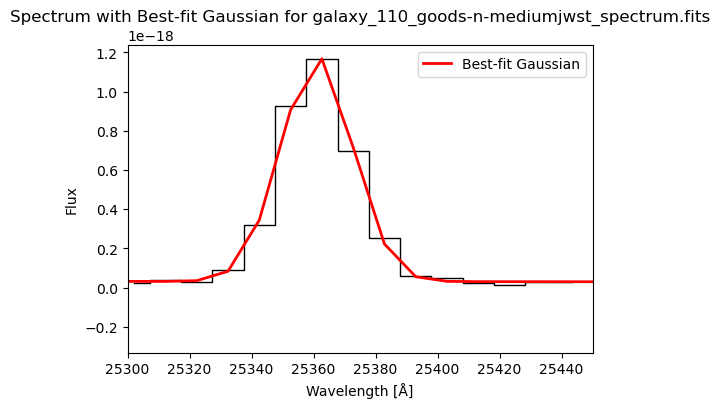

In [ ]:
# Let's plot the spectrum and the best-fit Gaussian together

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig, ax = plot_spectrum(raw_data_dir+spectrum_fn, fig=fig, ax=ax, wave_range=test_wave_range)

# Use read_spectrum() to get the wavelength array for plotting
wave, flux = read_spectrum(raw_data_dir+spectrum_fn)

# Apply the gaussian function to the wavelength array
flux_fit = gaussian(wave, *fit)  
# Note: *fit unpacks the fit array into individual parameters
# This is the same as gaussian(wave, fit[0], fit[1], fit[2], fit[3], fit[4])

# Plot the best-fit Gaussian
ax.plot(wave, flux_fit, color='red', lw=2, label='Best-fit Gaussian')
ax.set_title(f'Spectrum with Best-fit Gaussian for {spectrum_fn}')
ax.legend()
plt.show()

We will need to plot Gaussian fits many times later. Turning this into a function will save us time later...

In [68]:
# Can you turn this plotting code into a function?

def plot_gaussian_fit(filename, wave_range=None, fig=None, ax=None):
    """
    Plots the spectrum and the best-fit Gaussian for a given filename.

    Parameters:
        filename (str): Path to the spectrum file.
        wave_range (tuple, optional): (wave_min, wave_max) for x-axis limits.
        fig (matplotlib.figure.Figure, optional): Existing figure to use.
        ax (matplotlib.axes.Axes, optional): Existing axes to use.

    Returns:
        fig, ax: The figure and axis containing the plot.
    """
    # Fit the Gaussian to the spectrum
    fit, fit_err = fit_gaussian(filename, wave_range)
    # Read the spectrum data and create the fit curve
    wave, flux = read_spectrum(filename)
    flux_fit = gaussian(wave, *fit)

    if ax is None or fig is None:
        fig, ax = plt.subplots(figsize=(6, 4))

    fig, ax = plot_spectrum(filename, wave_range=wave_range, fig=fig, ax=ax)
    ax.plot(wave, flux_fit, color='red', lw=2, label='Best-fit Gaussian')
    ax.set_title(f'Spectrum with Best-fit Gaussian for {os.path.basename(filename)}')
    ax.legend()

    return fig, ax

In [41]:
# Print out the best-fit parameters
print(f"Best-fit parameters for spectrum in {spectrum_fn}")
print(f"Amplitude: {fit[0]:.3f}") # :.3f means print 3 decimal places
print(f"Center: {fit[1]:.3f}")
print(f"Width: {fit[2]:.3f}")
print(f"Slope: {fit[3]:.3f}")
print(f"Intercept: {fit[4]:.3f}")


Best-fit parameters for spectrum in galaxy_110_goods-n-mediumjwst_spectrum.fits
Amplitude: 0.000
Center: 25361.048
Width: 11.526
Slope: -0.000
Intercept: 0.000


What is the observed wavelength of the emission line?  

## Do the same process for the second spectrum

In [ ]:
# Now, let's repeat the fitting for the second spectrum
spectrum_fn = 'FIXME_spectrum2.fits'

FIXME
FIXME
FIXME



In [ ]:
FIXME
FIXME
FIXME
FIXME


How different are the observed wavelengths of this emission line in spectrum 1 and spectrum 2? 

***

# Fitting emission lines in many spectra

Now that we've found the wavelength of an emission line in one spectrum, let's do the same procedure for a whole bunch of spectra!

## Crop the spectra and save the wavelength ranges

> Coding learning goal:
>*  Read in filenames from a directory
>*  Create a pandas DataFrame to save filenames and corresponding info
>*  Save a list of information to a .csv file

First of all, we need to isolate the one emission line in each spectrum so our fitting code doesn't get confused. You will need to manually inspect each spectrum and determine the wavelength range to crop.

In [75]:
# Load in 10 spectra

# Use os.listdir to get the filenames
filenames_arr = os.listdir(raw_data_dir)
# Filter the filenames to only include .fits files
filenames_arr = [fn for fn in filenames_arr if fn.endswith('.fits')]
# Limit to the first 10 filenames
few_filenames_arr = filenames_arr[:2]  # Adjust the number as needed

Now that we have a list of the 10 spectra, let's display them one at a time and save the wavelength range for each spectrum in "wave_range_list".  

In [59]:
# Initialize an array to store the wavelength ranges for each spectrum
#### DON'T RUN THIS AFTER YOU HAVE STARTED THE NEXT CELL! ####
wave_range_list = np.zeros((len(few_filenames_arr), 2))

In [76]:
file_no = 3    # Change this number from 0 to 9

# Show the full spectrum
spectrum_fn = few_filenames_arr[file_no]

# Define a new wavelength range
min_wave = 20000. #nm
max_wave = 30000. #nm
test_wave_range = [min_wave, max_wave]

fig, ax = plt.subplots(1,1, figsize=(6,4))
fig, ax = plot_spectrum(raw_data_dir+spectrum_fn, fig=fig, ax=ax, wave_range=test_wave_range)

# Save the test_wave_range to wave_range_list
wave_range_list[file_no] = test_wave_range

IndexError: list index out of range

In [77]:
# Let's check what the wave_range_list looks like
print("Wave range list:")
print(wave_range_list)

Wave range list:
[[27000. 27150.]
 [23250. 23450.]]


After filling wave_range_list, we can save the min_wave and max_wave with the corresponding filename. 

In [87]:
# Save filename and wave_range_list into a .csv file

# Create a pandas DataFrame to store the filenames and wave ranges
df = pd.DataFrame({
    'filename': few_filenames_arr,
    'min_wave': wave_range_list[:, 0],
    'max_wave': wave_range_list[:, 1]
})

# Save the DataFrame to a CSV file
output_filename = 'waveranges.csv'
df.to_csv(output_filename, index=False)
# Print the DataFrame to check
print(df)

                                           filename  min_wave  max_wave
0  galaxy_10000885_goods-n-mediumjwst_spectrum.fits   27000.0   27150.0
1       galaxy_1137_goods-n-mediumhst_spectrum.fits   23250.0   23450.0


Just to save you some time, we helped you crop about 50 other spectra! Let's load them in and add them to the file you created above...

In [88]:
# Load in the premade waveranges .csv file
premade_waverange_fn = 'data/premade_waverange.csv'

# Read the CSV file into a pandas DataFrame
premade_df = pd.read_csv(premade_waverange_fn)
# Remove the rows that contain the same filename as the original df
cropped_premade_df = premade_df[~premade_df['filename'].isin(few_filenames_arr)]

# Combine the two dataframes
combined_df = pd.concat([df, cropped_premade_df], ignore_index=True)
# Save the combined DataFrame to a new CSV file
combined_output_filename = 'combined_waveranges.csv'
combined_df.to_csv(combined_output_filename, index=False)

***

## For Loop to apply the procedure on many spectra

> Coding learning goal: 
>*  Write for loops to apply a procedure to many files
>*  Append data to a list

Now that we have 55 spectra, we wouldn't want to manually change the file_no 55 times to perform our Gaussian fitting. Let us learn how to write a for loop to make the computer do the repetitious work for us!

In [89]:
# Before doing anything, we need to read in the big list of filenames and wavelength ranges
combined_output_filename = 'combined_waveranges.csv'
combined_df = pd.read_csv(combined_output_filename)

filename_arr = combined_df.filename
min_wave_arr = combined_df.min_wave
max_wave_arr = combined_df.max_wave

Error fitting Gaussian for galaxy_42789_goods-s-mediumjwst_spectrum.fits: array must not contain infs or NaNs
Error fitting Gaussian for galaxy_946_goods-n-mediumhst_spectrum.fits: array must not contain infs or NaNs


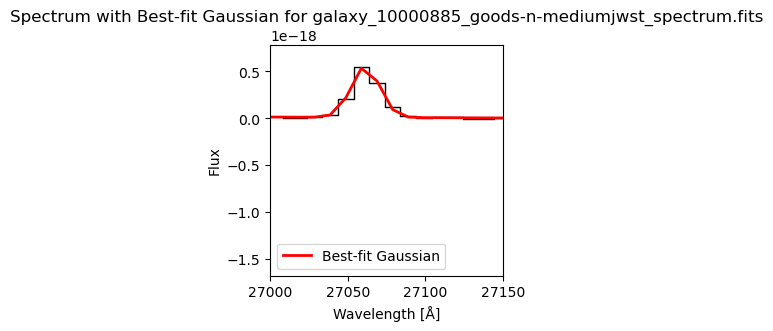

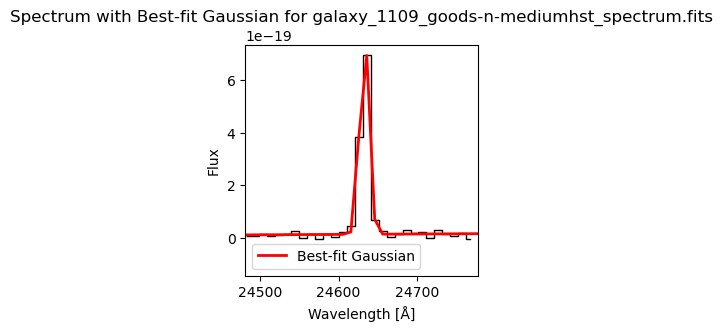

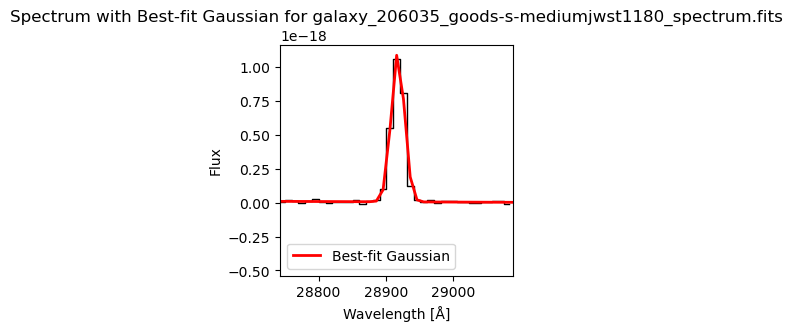

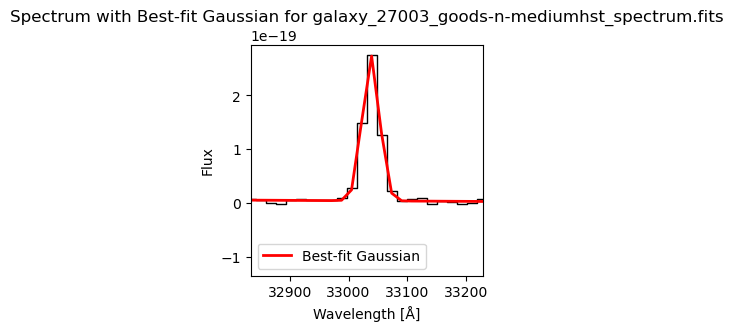

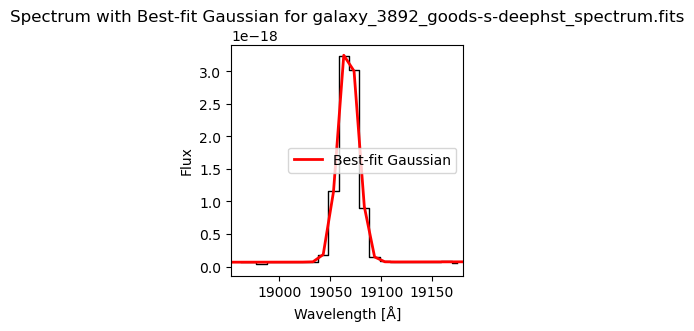

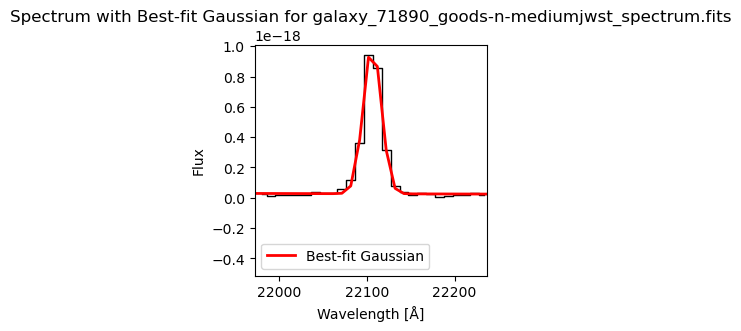

In [92]:
# First, initialize an empty list to store the fitted line centers
fitted_centers = []
fitted_centers_err = []

# Now, create a For Loop to go through each row
for row in range(len(filename_arr)):

    # Get the filename and waveranges for a specific galaxy
    spectrum_fn = filename_arr[row]
    min_wave = min_wave_arr[row]
    max_wave = max_wave_arr[row]
    wave_range = [min_wave, max_wave]

    # Fit a Gaussian to the spectrum
    try:
        fit, fit_err = fit_gaussian(raw_data_dir+spectrum_fn, wave_range=wave_range)
    except Exception as e:
        print(f"Error fitting Gaussian for {spectrum_fn}: {e}")
        fitted_centers.append(np.nan)
        fitted_centers_err.append(np.nan)
        continue

    # We want the line center, which is index 1
    center = fit[1]
    center_err = fit_err[1]

    # Add this info into our empty lists
    fitted_centers.append(center)
    fitted_centers_err.append(center_err)

    # Just to make sure the code is running correcting in general,
    # we can display a few of the fitted Gaussians.
    # Let's do this for every 10 spectra:
    if row%10 == 0:
        fig, ax = plt.subplots(figsize=(3,3))
        fig, ax = plot_gaussian_fit(raw_data_dir+spectrum_fn, wave_range=wave_range, fig=fig, ax=ax)
    
    
    
# Turn the lists into numpy arrays
fitted_centers = np.array(fitted_centers)
fitted_centers_err = np.array(fitted_centers_err)

In [93]:
# Save the arrays to the combined output .csv file

# Make a new dataframe with the filename, fitted_centers, and fitted_centers_err
fit_df = pd.DataFrame({
    'filename': filename_arr,
    'fitted_centers': fitted_centers,
    'fitted_centers_err': fitted_centers_err,
})

fit_filename = 'fitted_centers.csv'
fit_df.to_csv(fit_filename, index=False)

***

# Adding redshift information to our catalog

> Coding learning goal:
>*  Read in a .csv file as a pandas DataFrame
>*  Transfer information from one file into our main file

Astronomers have previously observed these galaxies and figured out their redshifts. These values are recorded in the file `redshift_catalogs.csv`. Read in the redshifts and add them to your table with filenames and fitted line centers.

In [95]:
redshift_catalog_fn = 'data/redshift_catalog.csv'

# Read the CSV file into a pandas DataFrame
redshift_catalog_df = pd.read_csv(redshift_catalog_fn)

# Merge the fitted centers with the redshift catalog
merged_df = pd.merge(fit_df, redshift_catalog_df, on='filename', how='outer')

# Save the merged DataFrame to a new CSV file
merged_output_filename = 'fitted_centers_redshift.csv'
merged_df.to_csv(merged_output_filename, index=False)

***

# Plotting our results

> Coding learning goal:
>*  Plot data points
>*  Fit a line to data points and plot the line

Now that we have a list of observed emission line centers and corresponding redshifts, we can study how wavelengths vary with redshift. First, we need to create an *observed wavelength vs. redshift* plot.

## Observed wavelength vs. redshift

What data should we have as the x-axis and y-axis?

In [97]:
merged_output_filename = 'fitted_centers_redshift.csv'
merged_df = pd.read_csv(merged_output_filename)

# Populate a redshift array (x)
redshift_arr = merged_df['z'].values

# Populate an observed wavelength array (y)
observed_wave_arr = merged_df['fitted_centers'].values

# Populate an error array (y_err)
observed_wave_err_arr = merged_df['fitted_centers_err'].values

Text(0.5, 1.0, 'Observed Wavelength vs. Redshift')

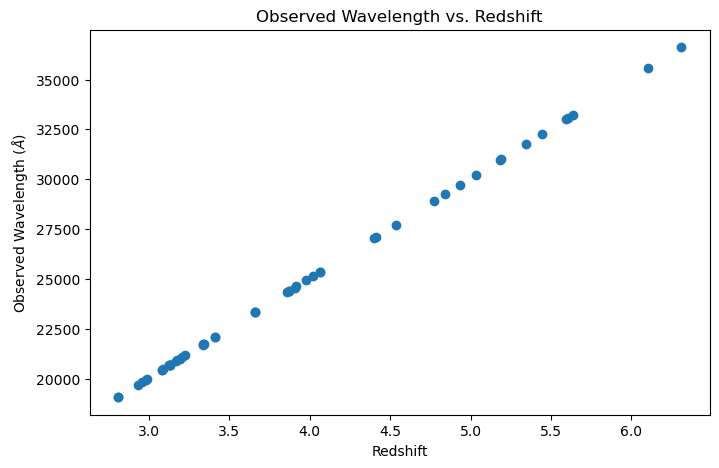

In [106]:
# Plot the data with error bars
fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(redshift_arr, observed_wave_arr, yerr=observed_wave_err_arr, fmt='o', color='C0', ecolor='lightgray', elinewidth=1, capsize=3)
ax.set_xlabel('Redshift')
ax.set_ylabel(r'Observed Wavelength ($\AA$)')
ax.set_title('Observed Wavelength vs. Redshift')


## Fit a model to the data

We will try to fit a straight line through the data points. Recall that the equation of a line is<br>
$y = m \times x + b$<br>
where $m$ is the slope and $b$ is the y-intercept.<p>

Let's make this equation a little clearer by labeling $y$ as the observed wavelength $\lambda_{\mathrm{obs}}$ and $x$ as the redshift $z$:<br>
$\lambda_{\mathrm{obs}} = m \times z + b $ 

In [100]:
# Define the equation

def straight_line(z, m, b):
  return m * z + b

In [102]:
# Use scipy.optimize.curve_fit() to fit the data

# Get rid of NaN values in the arrays
valid_indices = ~np.isnan(redshift_arr) & ~np.isnan(observed_wave_arr)
redshift_arr = redshift_arr[valid_indices]
observed_wave_arr = observed_wave_arr[valid_indices]
observed_wave_err_arr = observed_wave_err_arr[valid_indices]

fit, cov = curve_fit(straight_line, redshift_arr, observed_wave_arr)

# Extract the slope and intercept from the fit parameters
slope = fit[0]
intercept = fit[1]

# Get the fit errors
err = np.sqrt(np.diag(cov))
slope_err = err[0]
intercept_err = err[1]

# Print the fit parameters and errors
print(f"Slope (m): {slope:.3f} ± {slope_err:.3f}")
print(f"Intercept (b): {intercept:.3f} ± {intercept_err:.3f}")

Slope (m): 5008.137 ± 0.350
Intercept (b): 5009.008 ± 1.419


## Plot our best-fit line

In [103]:
# Get the fitted line values
fitted_line = straight_line(redshift_arr, slope, intercept)

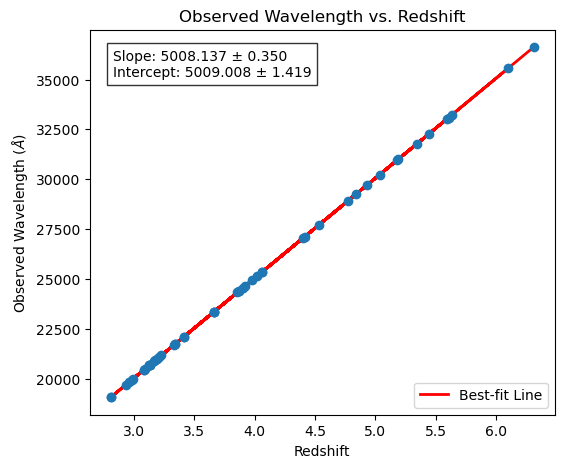

In [114]:
# Plot data and overlay best-fit
fig, ax = plt.subplots(figsize=(6, 5))

ax.errorbar(redshift_arr, observed_wave_arr, yerr=observed_wave_err_arr, fmt='o')
ax.plot(redshift_arr, fitted_line, color='red', lw=2, label='Best-fit Line')

# Add text box with fit parameters
ax.text(0.05, 0.95, f'Slope: {slope:.3f} ± {slope_err:.3f}\nIntercept: {intercept:.3f} ± {intercept_err:.3f}',
        transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

ax.set_xlabel('Redshift')
ax.set_ylabel(r'Observed Wavelength ($\AA$)')
ax.set_title('Observed Wavelength vs. Redshift')
ax.legend()

# fig.savefig(figure_dir+'redshift_vs_observed_wavelength.png', dpi=300)

# What is the rest wavelength of this emission line?

Turns out, the actual equation for the redshifting of observed wavelength is<br>
$\lambda_{\mathrm{obs}} = \lambda_{\mathrm{rest}} \times (1+z)$.<p>

According to our equation $\lambda_{\mathrm{obs}} = m \times z + b $, what do $m$ and $b$ correspond to?

How close was your straight line to matching the redshifting equation?

What is the rest wavelength $\lambda_{\mathrm{rest}}$ of our emission line?

<div class="alert alert-block alert-success">
<b>Congratulations!</b><p>
You just finished this redshift project. You should now have some experience with:
<ul>
    <li>Locating files/directories and accessing them via their paths</li>
    <li>Reading function definitions and understanding how to use them</li>
    <li>Plotting a spectrum and overlaying fitted curves</li>
    <li>Loading data from .csv files and saving data to them</li>
    <li>Using pandas DataFrame to manipulate large lists</li>
    <li>Fitting models to data (Gaussians and straight lines)</li>
    <li>Writing For Loops to perform the same analysis to a large set of data</li>
    <li>Comparing results with physical equations</li>
</div>

# Things to include in your presentation

Instrument and data:
*   All the spectra you saw were taken by the James Webb Space Telescope (JWST), specifically the instrument called NIRSpec. What is so special about them? Is this telescope new? How far away is it from Earth?

Background info about galaxies and redshifting:
*   Why are the spectra of some galaxies redshifted? What determines how redshifted a galaxy is?
*   What does a typical galaxy spectrum look like? What features are there?

What you did in this project:
*   What was the goal of this project? What were the main analysis steps you performed?
*   Show some of the plots you made!
*   What is the emission line you found here? 
*   What chemical element produces this line? Is it an important element?